# **Training a  Convolutional Neural Network on the MNIST dataset.**

In this notebook, we are using a simple convolutional neural network architecture to classify the MNIST dataset. 
>

**Prerequisites:**
* **Basic knowledge of Deep Learning and Convolutional Neural Networks.**

**Libraries:**
* **Keras:** A library for creating neural networks in few lines.
* **Matplotlib:** Matplotlib is a plotting library. You can use it to draw different types of graphs, like line, scattered, bar, etc.
>


# Introduction


MNIST dataset consist of  70,000 images of hand written digits. We are trying to build a model that predicts the written number in a black and white 28x28 pixels  image. MNIST has a training set of 60,000 examples, and a test set of 10,000 examples. Later on, we will see that we can achive 99% accuracy on test set using our CNN model. 
>



CNN's are very useful for dealing with image recognition problems. Because of their mathematical nature, they can be trained faster than simple deep neural networks and they can do more work with less parameters. They are not only good for image classification problems (like ours), they can be used in fields such as object detection, image captioning and generating images.
>

If you want to know more about convolutional neural networks and how they work, pelase check out [Andrew Ng's free tutorials](https://www.youtube.com/watch?v=ArPaAX_PhIs&list=PLkDaE6sCZn6Gl29AoE31iwdVwSG-KnDzF) on youtube. He explains mathematics of convolutional layers  in details.
>

We will create a model using Convolution, Max Pooling, Droput, and Dense (Fully Connected) layers. I will explain why and how we use them in the Model section. 

# Preprocessing

First, we are importing Keras and Matplotlib.
We dont have to manually download the MNIST dataset since we can import it directly from Keras.

"keras.models" includes "Sequential" class which is the base of our neural network model.
We will be adding layers one by one into it later.

If you are not familiar with Keras, I would suggest taking a brief look at their [documentation](https://keras.io/).

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.datasets import mnist

import matplotlib.pyplot as plt

Our data comes as train and test data. They both include inputs which are 28x28 pixel values that ranges from 0 to 255 and labels which is a single integer that  ranges from 0 to 9. Each example in our input data comes in the form of two dimentional matrix as default. Let's load our data and print some examples.


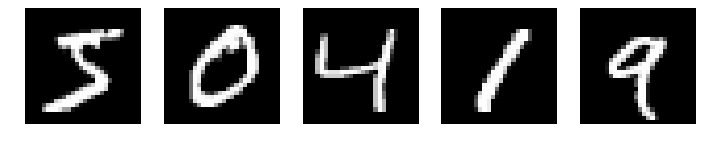

In [0]:
(input_train, output_train), (input_test, output_test) = mnist.load_data()

f, axarr = plt.subplots(1, 5, figsize=(12, 12))
for i in range(5):
  axarr[i].imshow(input_train[i], cmap="Greys_r")
  axarr[i].axis("off")


For our CNN to work properly, we are reshaping our input data to have an extra channel dimention. These channel dimentions were suppose to keep RGB colors but since our images are black and white, we only need to have one channel.
>

*First dimention of our data gives us the number of examples it contains. That's why we are keeping it with "x_train.shape[0]" and "x_test.shape[0]".*

In [0]:
print("Default shape of training inputs:", input_train.shape)

input_train = input_train.reshape(input_train.shape[0], 28, 28, 1)
input_test = input_test.reshape(input_test.shape[0], 28, 28, 1)

print("New shape of training inputs:", input_train.shape)

Default shape of training inputs: (60000, 28, 28)
New shape of training inputs: (60000, 28, 28, 1)


Then we are dividing each pixel value by 255 because we want our input values to scale from 0 to 1. This process is called "feature scaling" and it helps our model to converge mininmum loss faster in the training process.

In [0]:
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

input_train /= 255
input_test /= 255

And finally we are changing our labels to one-hot vectors. This process is essential for classification problems like this. It is also necessary for our last activation function "Softmax" to work.
>

Examples of one-hot encoding:
>

0 becomes [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
>

1 becomes [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
>

9 becomes [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [0]:
print("Example of a training label before one-hot encoding:", output_train[0])

output_train = keras.utils.to_categorical(output_train, 10)
output_test = keras.utils.to_categorical(output_test, 10)

print("Same label after one-hot encoding:", output_train[0])

Example of a training label before one-hot encoding: 5
Same label after one-hot encoding: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# Model

Now, let's create our model. We are initiating our sequential object with a list that contains the layers we want to use.

* **Conv2D:** This is our convolutional layer, first parameter takes the filter amount and the second parameter takes the kernel size of these filters.

* **MaxPooling2D:** It helps over-fitting by providing an abstracted form of activations. As well, it reduces the computational cost by reducing the number of parameters to learn. It takes pooling size as parameter.

* **Flatten:** It takes multi dimentional activations from the last layer and flattens it to one dimention, so we can connect dense layers after it.

* **Dropout:** Dropout refers to ignoring units (neurons) during the training phase of certain set of neurons which is chosen at random. This is a common solution for over-fitting.

* **Dense (Fully Connected):** They are the simple layers that have connections between every input and output neuron. Because of this, they have lots of parameters to be trained.

We will use ReLUs (Rectified Linear Units) as activation functions for the hidden layers and Softmax function for the last layer. We should use Softmax in multi-class problems.

*Side note:  We only have to specify input shape on first layer. (Shape of a single example)*
> 

![convnet](https://codetolight.files.wordpress.com/2017/11/network.png)

In [0]:
model = Sequential([
    Conv2D(10, 5, activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(2),
    Conv2D(20, 5, activation='relu'),
    MaxPooling2D(2),
    Dropout(0.25),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 24, 24, 10)        260       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 10)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 20)          5020      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 20)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 4, 4, 20)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 320)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               32100     
__________

Now we have to decide which optimizer and loss function to use for our model. Since this is a classification problem and since we are using Softmax for the last activation function, Categorical Crossentropy should be our choice. 

And for our optimizer, we can pick Adam or Adadelta. They are usually my first picks because it's shown that they work really well with lots of different problems.
>

**Loss Function:** Categorical Crossentropy

For more information about Keras loss functions [click here](https://keras.io/losses/).
>

**Optimizer:** Adadelta

For more information about Keras optimizers [click here](https://keras.io/optimizers/).



In [0]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

# Training

Let's train our model. Additional to loss, accuracy will be calculated and  printed out on every epoch.

In [0]:
history = model.fit(input_train,
                    output_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 4s 81us/step - loss: 0.3556 - acc: 0.8875 - val_loss: 0.1153 - val_acc: 0.9656
Epoch 2/10
48000/48000 [==============================] - 3s 70us/step - loss: 0.1138 - acc: 0.9651 - val_loss: 0.0734 - val_acc: 0.9783
Epoch 3/10
48000/48000 [==============================] - 3s 70us/step - loss: 0.0870 - acc: 0.9728 - val_loss: 0.0546 - val_acc: 0.9844
Epoch 4/10
48000/48000 [==============================] - 3s 69us/step - loss: 0.0713 - acc: 0.9771 - val_loss: 0.0522 - val_acc: 0.9840
Epoch 5/10
48000/48000 [==============================] - 3s 69us/step - loss: 0.0617 - acc: 0.9804 - val_loss: 0.0497 - val_acc: 0.9856
Epoch 6/10
48000/48000 [==============================] - 3s 69us/step - loss: 0.0544 - acc: 0.9823 - val_loss: 0.0441 - val_acc: 0.9873
Epoch 7/10
48000/48000 [==============================] - 3s 70us/step - loss: 0.0482 - acc: 0.9846 - val_loss: 0.0406 - val_acc

We can see how training went using our history object.

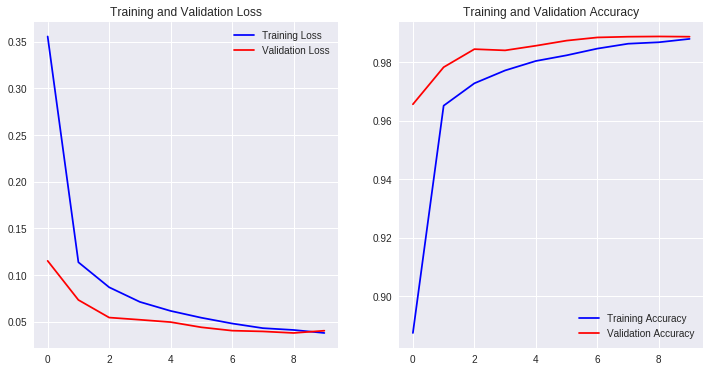

In [0]:
loss = history.history['loss']
acc = history.history['acc']
val_loss = history.history['val_loss']
val_acc = history.history['val_acc']
epochs = range(len(loss))

f, axarr = plt.subplots(1, 2, figsize=(12, 6))
p0 = axarr[0]
p1 = axarr[1]

p0.set_title("Training and Validation Loss")
p1.set_title("Training and Validation Accuracy")

p0l0 = p0.plot(epochs, loss, "-b", label="Training Loss")
p0l1 = p0.plot( epochs, val_loss, "-r", label="Validation Loss")

p1l0 = p1.plot(epochs, acc, "-b", label="Training Accuracy")
p1l1 = p1.plot(epochs, val_acc, "-r", label="Validation Accuracy")

legend0 = p0.legend()
legend1 = p1.legend()

# Evaluation

Finally the training process is done. Now we can evaluate our model's performance on the test set.

In [0]:
score = model.evaluate(input_test, output_test)

print('Test Loss:', score[0])
print('Test Accuracy:', score[1])

10000/10000 [==============================] - 1s 71us/step
Test Loss: 0.029195744402389392
Test Accuracy: 0.9907


As you can see, our model's predictions are 99% accurate on the test set.

Let's predict couple of examples.
>

*Side note: You can't predict single examples with "model.predict()". But you can reshape the data to have an extra batch size dimention to fix it.*

In [0]:
predictions = model.predict(input_test[0:5])

true_labels = output_test[0:5]

for i in range(len(predictions)):
  print("Prediction:", predictions[i].argmax(), ",",
        "True Label:", true_labels[i].argmax())

Prediction: 7 , True Label: 7
Prediction: 2 , True Label: 2
Prediction: 1 , True Label: 1
Prediction: 0 , True Label: 0
Prediction: 4 , True Label: 4
